# STC DATA

Group: U_Data

Members:
Aroob Almutairi 
Abdulrahman Alosaimi
Duaa Al saad 
Fatimah Alateeq
Ghaliah mohammedhussein
Jawaher madkhali


In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline 

### Exploratory Data Analysis [EDA]

In [3]:
df=pd.read_csv('STC_IP_TV.txt')

Dataset Description:
Introduction:
Recommender systems are among the most popular applications of data science today. They are used to predict “best next action” for a customer or “rating of preference” that a user would give to items. Today, major tech company has applied them in some form or the other. For example, YouTube uses it to decide which video to play next on autoplay, Facebook uses it to recommend pages to like and people to follow, and Amazon uses it to suggest products to customers, and so on. In general, there are three ways to build a recommendation engine:
1. Popularity based recommendation engine
2. Content based recommendation engine
3. Collaborative filtering based recommendation engine
Another type of recommendation system is Hybrid model which can be created by mixing two or more types of recommendation systems. This type of recommendation systems usually gives better performance.

The IPTV dataset contains the following features and it has more than 70 million rows and the size of data is more than 1 terabyte (TB), a sample is provided here:
User ID
`SESSION START (DATE/TIME)
SESSION DURATION
PROGRAM NAME
PROGRAM DESCRIPTION
PREOGRAM GENRE
PROGRAM CLASS
SERIES TITLE
SERIES NAME
Episode title
Episode number`

In [4]:
df.head()

,Unnamed: 0,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name
0,1,2017-05-27,26138,100 treets,40,MOVIE,0,0,Drama Movie100 Streets,Drama,0,0,100 treets
1,3,2017-05-21,7946,Moana,17,MOVIE,0,0,Animation MovieMoana (HD),Animation,0,1,Moana
2,4,2017-08-10,7418,The Mermaid Princess,8,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
3,5,2017-07-26,19307,The Mermaid Princess,76,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
4,7,2017-07-07,15860,Churchill,87,MOVIE,0,0,Biography MovieChurchill (HD),Biography,0,1,Churchill


In [5]:
df.shape

(3598607, 13)

In [6]:
df.describe()

,Unnamed: 0,user_id_maped,duration_seconds,season,episode,series_title,hd
count,3.598607e+06,3.598607e+06,3.598607e+06,3.598607e+06,3.598607e+06,3.598607e+06,3.598607e+06
mean,2.131563e+06,1.735909e+04,1.177636e+03,1.426785e+00,7.028602e+00,1.185486e-02,3.624603e-01
std,1.228107e+06,9.905868e+03,6.231967e+03,2.143461e+00,1.345125e+01,1.082328e-01,4.807108e-01
min,1.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.072510e+06,8.689000e+03,5.800000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.124760e+06,1.732700e+04,1.750000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,3.190420e+06,2.571400e+04,1.327000e+03,1.000000e+00,1.000000e+01,0.000000e+00,1.000000e+00
max,4.278704e+06,3.428300e+04,2.053603e+06,2.300000e+01,2.820000e+02,1.000000e+00,1.000000e+00


In [7]:
# Selecting categorical columns
df.describe(exclude = 'number')

,date_,program_name,program_class,program_desc,program_genre,original_name
count,3598607,3598607,3598607,3554642,3598607,3598607
unique,411,8661,2,11758,16,1828
top,2017-04-28,Pingu,SERIES/EPISODES,Animation MovieThe Boss Baby (HD),Animation,PAW Patrol
freq,14194,93062,2053655,79781,1524643,118213


In [8]:
# Note: used to select the columns with object data type
df.describe(include='O')

,date_,program_name,program_class,program_desc,program_genre,original_name
count,3598607,3598607,3598607,3554642,3598607,3598607
unique,411,8661,2,11758,16,1828
top,2017-04-28,Pingu,SERIES/EPISODES,Animation MovieThe Boss Baby (HD),Animation,PAW Patrol
freq,14194,93062,2053655,79781,1524643,118213


In [9]:
# Check types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3598607 entries, 0 to 3598606
Data columns (total 13 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   Unnamed: 0        int64 
 1   date_             object
 2   user_id_maped     int64 
 3   program_name      object
 4   duration_seconds  int64 
 5   program_class     object
 6   season            int64 
 7   episode           int64 
 8   program_desc      object
 9   program_genre     object
 10  series_title      int64 
 11  hd                int64 
 12  original_name     object
dtypes: int64(7), object(6)
memory usage: 356.9+ MB


In [10]:
df['date_']= pd.to_datetime(df['date_']) #changing date type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3598607 entries, 0 to 3598606
Data columns (total 13 columns):
 #   Column            Dtype         
---  ------            -----         
 0   Unnamed: 0        int64         
 1   date_             datetime64[ns]
 2   user_id_maped     int64         
 3   program_name      object        
 4   duration_seconds  int64         
 5   program_class     object        
 6   season            int64         
 7   episode           int64         
 8   program_desc      object        
 9   program_genre     object        
 10  series_title      int64         
 11  hd                int64         
 12  original_name     object        
dtypes: datetime64[ns](1), int64(7), object(5)
memory usage: 356.9+ MB


In [11]:
# Find the missing values
df.isna().sum()

Unnamed: 0              0
date_                   0
user_id_maped           0
program_name            0
duration_seconds        0
program_class           0
season                  0
episode                 0
program_desc        43965
program_genre           0
series_title            0
hd                      0
original_name           0
dtype: int64

In [12]:
# Find the percentage of missing values
round (df.isna().sum()/df.shape[0], 2)

Unnamed: 0          0.00
date_               0.00
user_id_maped       0.00
program_name        0.00
duration_seconds    0.00
program_class       0.00
season              0.00
episode             0.00
program_desc        0.01
program_genre       0.00
series_title        0.00
hd                  0.00
original_name       0.00
dtype: float64

In [13]:
df.sample(10)

,Unnamed: 0,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name
1433118,1694930,2017-05-21,31316,Qabel Lel Kaser Ep12,94,SERIES/EPISODES,1,12,"Drama MovieQabel Lel Kaser, S01, Ep13",Drama,0,0,Qabel Lel Kaser (T)
2385329,2819478,2017-04-18,17327,Littlest Pet hop (T) Blythe’s Crush,1251,SERIES/EPISODES,1,8,NaN,Animation,0,1,Littlest Pet hop (T)
3073015,3637683,2017-09-15,11372,Nan and Lili Ep.,195,SERIES/EPISODES,1,96,"Animation MovieNan and Lili, Season 1, Ep. 97",Animation,0,0,Nan and Lili
1853657,2189660,2017-05-19,8307,Sully,7,MOVIE,0,0,Biography MovieSully (HD),Biography,0,1,Sully
3169880,3757092,2017-10-20,31895,Rubbadubbers Ep,613,SERIES/EPISODES,4,11,"Animation MovieRubbadubbers, Season 4, Ep 12",Animation,0,0,Rubbadubbers
239883,291201,2017-09-18,18941,Wannous Ep23,23,SERIES/EPISODES,1,23,"Drama MovieWannous, S01, Ep23 (HD)",Drama,0,0,Wannous
1913195,2259834,2017-08-03,24931,Blackish Old Digger,9,SERIES/EPISODES,2,9,Comedy MovieOld Digger (HD),Comedy,0,0,Blackish
1235176,1464191,2017-11-15,23386,PAW Patrol Pups ave The Treats / Pups Get A L...,1887,SERIES/EPISODES,1,9,Animation MoviePups Save The Treats / Pups Get...,Animation,0,0,PAW Patrol
410074,493818,2018-04-15,27766,The Thundermans The Weekend Guest,1354,SERIES/EPISODES,1,6,Comedy MovieThe Weekend Guest (HD),Comedy,0,0,The Thundermans
1743853,2058334,2017-08-10,8692,#FollowFriday,65,MOVIE,0,0,Thriller Movie#FollowFriday,Thriller,0,0,#FollowFriday


In [14]:
df['user_id_maped'].value_counts()
# this column have high counts for many accounts which could be an business accounts or hacked accounts

23026    11944
14263    11067
11372    10020
6321      9748
25334     9520
         ...  
3440         1
25959        1
10781        1
6384         1
29963        1
Name: user_id_maped, Length: 29487, dtype: int64

In [15]:
# this column have the same value of other columns, so it had no impact 
df.drop(['Unnamed: 0','program_desc','series_title'],axis=1, inplace=True)
df.dropna(inplace=True)
df.shape

(3598607, 10)

In [16]:
df['date_'].value_counts() 
# here we could know the months and days that have high shows 
# and which type it show, and we could recommend movies by holydays

2017-04-28    14194
2017-04-22    13807
2017-03-25    13788
2017-11-21    13566
2017-03-17    13511
              ...  
2017-05-27     4795
2017-05-28     4316
2017-06-22     4202
2017-06-24     4162
2017-06-25     3897
Name: date_, Length: 411, dtype: int64

In [17]:
df['program_name'].value_counts() 
# this column shows the subName, and we could know the best episode or the best part of the movie/series

Pingu                                                93062
The Boss Baby                                        79781
Oscar's Oasis                                        45806
The Adventures of Petey and Friends                  40565
Trolls                                               36656
                                                     ...  
The Big C     Goldilocks And The Bears                   1
The Big C     The Little C                               1
The Big C     The Big C    Ep03                          1
Criminal Minds     Hopeless                              1
Wild Animal Baby Explorers     Rainforest Wonders        1
Name: program_name, Length: 8661, dtype: int64

In [18]:
df['program_class'].value_counts() # here we see people whach the series more than movies

SERIES/EPISODES    2053655
MOVIE              1544952
Name: program_class, dtype: int64

In [19]:
df['season'].value_counts() # here people are likly to not complete the much long series

0     1545134
1     1181752
2      202347
3      167121
7      136912
4      117600
5       91525
6       86777
8       39223
9       14176
10       9120
12       2758
11        935
21        607
22        591
18        439
23        423
19        385
20        372
13        324
15         59
14         27
Name: season, dtype: int64

In [20]:
df['episode'].value_counts() 

0      1587681
1       226398
2       128271
3       112682
4       105430
        ...   
269         31
272         30
266         29
273         29
116          4
Name: episode, Length: 281, dtype: int64

In [21]:
df['duration_seconds'].mean() # average seconds = 19.6272598 minutes

1177.635590382612

In [22]:
df['program_genre'].value_counts() # here people liks animations 10 times than other genre

Animation                           1524643
Action                               542541
Drama                                492508
Comedy                               448535
Horror                               226644
Thriller                             133952
Family                               102143
Documentary                           50917
Biography                             47421
NOT_DEFINED_IN_UMS                    11775
Crime                                  9846
Sci-Fi                                 4610
Romance                                1433
SERIES_NOT_ADDED_UNDER_ANY_GENRE        838
Adventure                               744
Wrestling                                57
Name: program_genre, dtype: int64

In [23]:
df['hd'].value_counts()

0    2294255
1    1304352
Name: hd, dtype: int64

In [24]:
df['original_name'].value_counts()

PAW Patrol                          118213
Friends                             114168
Pingu                                93062
The Boss Baby                        81257
Blaze And The Monster Machines       75946
                                     ...  
Lars And The Real Girl                   1
Yamal A-Sham  Ep                         1
Hemlock Grove                            1
Takht harqi - Ep                         1
Unfaithful                               1
Name: original_name, Length: 1828, dtype: int64

In [25]:
df.drop(df[df['program_genre'] == 'SERIES_NOT_ADDED_UNDER_ANY_GENRE'].index, inplace = True)

In [26]:
df.columns

Index(['date_', 'user_id_maped', 'program_name', 'duration_seconds',
       'program_class', 'season', 'episode', 'program_genre', 'hd',
       'original_name'],
      dtype='object')

In [27]:
print(df.isnull().sum())
df

date_               0
user_id_maped       0
program_name        0
duration_seconds    0
program_class       0
season              0
episode             0
program_genre       0
hd                  0
original_name       0
dtype: int64


,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_genre,hd,original_name
0,2017-05-27,26138,100 treets,40,MOVIE,0,0,Drama,0,100 treets
1,2017-05-21,7946,Moana,17,MOVIE,0,0,Animation,1,Moana
2,2017-08-10,7418,The Mermaid Princess,8,MOVIE,0,0,Animation,1,The Mermaid Princess
3,2017-07-26,19307,The Mermaid Princess,76,MOVIE,0,0,Animation,1,The Mermaid Princess
4,2017-07-07,15860,Churchill,87,MOVIE,0,0,Biography,1,Churchill
...,...,...,...,...,...,...,...,...,...,...
3598602,2017-08-22,10486,Table,8,MOVIE,0,0,Comedy,1,Table
3598603,2017-08-22,10486,Newsies: the Broadway Musical,3,MOVIE,0,0,Family,1,Newsies: the Broadway Musical
3598604,2018-01-31,3674,Dragon Ball Z: Resurrection F,7,MOVIE,0,0,Animation,0,Dragon Ball Z: Resurrection F
3598605,2017-09-19,717,Table,97,MOVIE,0,0,Comedy,1,Table


## Preprocessing

In [28]:
df['duration_in_min']=df['duration_seconds']/60

In [29]:
df['duration_in_hour']=df['duration_in_min']/60

In [30]:
df['duration_in_hour'].max()

570.4452777777777

In [31]:
df['duration_seconds'].mean()

1177.4671617327294

In [32]:
df.loc[df['user_id_maped']==23747]['duration_in_hour'].sum()

162.02027777777775

In [33]:
len(df['user_id_maped'].unique())

29487

In [34]:
df.loc[(df['user_id_maped']==19000)&(df['date_']=='2017-03-14')]

,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_genre,hd,original_name,duration_in_min,duration_in_hour
101368,2017-03-14,19000,My Little Pony: Friendship Is Magic (T) A C...,65053,SERIES/EPISODES,2,25,Animation,0,My Little Pony: Friendship Is Magic (T),1084.216667,18.070278
252027,2017-03-14,19000,My Little Pony: Friendship Is Magic (T) Fam...,1326,SERIES/EPISODES,2,11,Animation,0,My Little Pony: Friendship Is Magic (T),22.100000,0.368333
436760,2017-03-14,19000,My Little Pony: Friendship Is Magic (T) The...,1412,SERIES/EPISODES,2,14,Animation,0,My Little Pony: Friendship Is Magic (T),23.533333,0.392222
475657,2017-03-14,19000,My Little Pony: Friendship Is Magic (T) ist...,1326,SERIES/EPISODES,2,5,Animation,0,My Little Pony: Friendship Is Magic (T),22.100000,0.368333
618898,2017-03-14,19000,My Little Pony: Friendship Is Magic (T) Lun...,1326,SERIES/EPISODES,2,4,Animation,0,My Little Pony: Friendship Is Magic (T),22.100000,0.368333
675895,2017-03-14,19000,My Little Pony: Friendship Is Magic (T) A C...,1650,SERIES/EPISODES,2,26,Animation,0,My Little Pony: Friendship Is Magic (T),27.500000,0.458333
778994,2017-03-14,19000,My Little Pony: Friendship Is Magic (T) ecr...,1326,SERIES/EPISODES,2,10,Animation,0,My Little Pony: Friendship Is Magic (T),22.100000,0.368333
922665,2017-03-14,19000,My Little Pony: Friendship Is Magic (T) A C...,177,SERIES/EPISODES,2,26,Animation,0,My Little Pony: Friendship Is Magic (T),2.950000,0.049167
1063239,2017-03-14,19000,My Little Pony: Friendship Is Magic (T) wee...,1325,SERIES/EPISODES,2,9,Animation,0,My Little Pony: Friendship Is Magic (T),22.083333,0.368056
1258845,2017-03-14,19000,My Little Pony: Friendship Is Magic (T) Rea...,1325,SERIES/EPISODES,2,16,Animation,0,My Little Pony: Friendship Is Magic (T),22.083333,0.368056


In [35]:
df_how_many_users=pd.DataFrame(df.groupby(['date_','user_id_maped']).agg({'duration_in_hour':'sum', 
                                                                         'user_id_maped':'count'}))
df_how_many_users

duration_in_hour  user_id_maped
date_      user_id_maped                                 
2017-03-14 15                     3.116389              6
           56                     4.307500             10
           77                     5.614722              3
           88                     4.694167             17
           100                    1.641944              1
...                                    ...            ...
2018-04-30 34096                  0.139167              5
           34104                  2.496389              8
           34158                  0.008333              2
           34190                  2.633333             11
           34237                  0.138611             19

[445114 rows x 2 columns]

In [36]:
df_how_many_users=df_how_many_users.rename(columns={'user_id_maped':'count'})

In [37]:
df_how_many_users.sort_values(by=['count'])

duration_in_hour  count
date_      user_id_maped                         
2017-06-30 12437                  0.011667      1
2017-09-03 9473                   0.025278      1
2017-04-30 20119                  0.000556      1
2017-09-03 9862                   0.217222      1
           9915                   0.000556      1
...                                    ...    ...
2018-03-02 2676                  23.463056   1159
2017-06-06 8044                  23.941111   1217
2018-04-22 24046                 23.955556   1348
2018-03-25 14564                 23.942222   1350
2018-03-26 14564                 23.956389   1351

[445114 rows x 2 columns]

In [38]:
print(df_how_many_users.index.get_level_values('user_id_maped').unique())

user_id=df_how_many_users.loc[(df_how_many_users['duration_in_hour']>=24) & (df_how_many_users['count']>=20)]
print(user_id)

user_id_2=df_how_many_users.loc[(df_how_many_users['count']>=2)&(df_how_many_users['count']<=20)]
print(user_id_2)

Int64Index([   15,    56,    77,    88,   100,   110,   152,   165,   170,
              200,
            ...
             2897,  4198,  8769, 10219, 23703, 23917, 25047, 27597, 28225,
            31308],
           dtype='int64', name='user_id_maped', length=29487)
                          duration_in_hour  count
date_      user_id_maped                         
2017-03-14 19000                 24.183611     21
2017-03-15 8224                  24.214167     22
           9437                  24.561389     37
           23664                 24.466667     37
2017-03-21 15658                 32.945278     33
...                                    ...    ...
2018-04-18 11274                 26.716111     23
2018-04-24 26478                 24.360000     26
2018-04-25 157                   24.107500     52
           1732                  24.216111     37
2018-04-27 19367                 25.399444     23

[277 rows x 2 columns]
                          duration_in_hour  count
date_    

In [39]:
user_id

duration_in_hour  count
date_      user_id_maped                         
2017-03-14 19000                 24.183611     21
2017-03-15 8224                  24.214167     22
           9437                  24.561389     37
           23664                 24.466667     37
2017-03-21 15658                 32.945278     33
...                                    ...    ...
2018-04-18 11274                 26.716111     23
2018-04-24 26478                 24.360000     26
2018-04-25 157                   24.107500     52
           1732                  24.216111     37
2018-04-27 19367                 25.399444     23

[277 rows x 2 columns]

In [40]:
user_id_2

duration_in_hour  count
date_      user_id_maped                         
2017-03-14 15                     3.116389      6
           56                     4.307500     10
           77                     5.614722      3
           88                     4.694167     17
           110                    0.843611      3
...                                    ...    ...
2018-04-30 34096                  0.139167      5
           34104                  2.496389      8
           34158                  0.008333      2
           34190                  2.633333     11
           34237                  0.138611     19

[310292 rows x 2 columns]

In [41]:
df['commercial_account']='No'
df['many_people_but_not_commercial_account']='No'

In [42]:
df

,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_genre,hd,original_name,duration_in_min,duration_in_hour,commercial_account,many_people_but_not_commercial_account
0,2017-05-27,26138,100 treets,40,MOVIE,0,0,Drama,0,100 treets,0.666667,0.011111,No,No
1,2017-05-21,7946,Moana,17,MOVIE,0,0,Animation,1,Moana,0.283333,0.004722,No,No
2,2017-08-10,7418,The Mermaid Princess,8,MOVIE,0,0,Animation,1,The Mermaid Princess,0.133333,0.002222,No,No
3,2017-07-26,19307,The Mermaid Princess,76,MOVIE,0,0,Animation,1,The Mermaid Princess,1.266667,0.021111,No,No
4,2017-07-07,15860,Churchill,87,MOVIE,0,0,Biography,1,Churchill,1.450000,0.024167,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3598602,2017-08-22,10486,Table,8,MOVIE,0,0,Comedy,1,Table,0.133333,0.002222,No,No
3598603,2017-08-22,10486,Newsies: the Broadway Musical,3,MOVIE,0,0,Family,1,Newsies: the Broadway Musical,0.050000,0.000833,No,No
3598604,2018-01-31,3674,Dragon Ball Z: Resurrection F,7,MOVIE,0,0,Animation,0,Dragon Ball Z: Resurrection F,0.116667,0.001944,No,No
3598605,2017-09-19,717,Table,97,MOVIE,0,0,Comedy,1,Table,1.616667,0.026944,No,No


In [43]:
for i,n in user_id.iterrows():
    df['commercial_account'].loc[df['user_id_maped']==i[1]]='Yes'
    


/var/folders/tl/ckghtyr17rxcxkw0h5l3y9s40000gn/T/ipykernel_7173/1734559117.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['commercial_account'].loc[df['user_id_maped']==i[1]]='Yes'


In [44]:
for i,n in user_id_2.iterrows():
    df['many_people_but_not_commercial_account'].loc[df['user_id_maped']==i[1]]='Yes'

/var/folders/tl/ckghtyr17rxcxkw0h5l3y9s40000gn/T/ipykernel_7173/2171598295.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['many_people_but_not_commercial_account'].loc[df['user_id_maped']==i[1]]='Yes'


In [45]:
df['commercial_account'].unique()

array(['No', 'Yes'], dtype=object)

In [46]:
df.loc[df['commercial_account']=='Yes']

,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_genre,hd,original_name,duration_in_min,duration_in_hour,commercial_account,many_people_but_not_commercial_account
4468,2018-02-17,19795,Dora the Explorer chool cience Fair,1381,SERIES/EPISODES,7,12,Animation,0,Dora the Explorer,23.016667,0.383611,Yes,Yes
4948,2018-03-28,19795,Dora the Explorer Dora's Fantastic Gymnastics...,1378,SERIES/EPISODES,7,5,Animation,0,Dora the Explorer,22.966667,0.382778,Yes,Yes
5425,2018-02-24,19795,Dora the Explorer A Ribbon For Pinto,1378,SERIES/EPISODES,7,2,Animation,0,Dora the Explorer,22.966667,0.382778,Yes,Yes
5907,2018-04-21,19795,Dora And Friends: Into The City Trick Or Treat,1377,SERIES/EPISODES,1,16,Animation,0,Dora And Friends: Into The City,22.950000,0.382500,Yes,Yes
6208,2018-01-04,19000,Littlest Pet hop now tormin',764,SERIES/EPISODES,3,6,Animation,0,Littlest Pet hop,12.733333,0.212222,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3589545,2017-08-22,536,Blindspot One Begets Technique,2866,SERIES/EPISODES,1,18,Action,0,Blindspot,47.766667,0.796111,Yes,Yes
3589549,2017-08-21,536,Blindspot A tray Howl,9,SERIES/EPISODES,1,2,Action,0,Blindspot,0.150000,0.002500,Yes,Yes
3589553,2017-08-21,536,Slugterra,25,SERIES/EPISODES,1,0,Animation,1,Slugterra,0.416667,0.006944,Yes,Yes
3589557,2017-06-26,536,Collateral Beauty,88,MOVIE,0,0,Drama,1,Collateral Beauty,1.466667,0.024444,Yes,Yes


In [47]:
df.loc[df['many_people_but_not_commercial_account']=='Yes']

,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_genre,hd,original_name,duration_in_min,duration_in_hour,commercial_account,many_people_but_not_commercial_account
0,2017-05-27,26138,100 treets,40,MOVIE,0,0,Drama,0,100 treets,0.666667,0.011111,No,Yes
1,2017-05-21,7946,Moana,17,MOVIE,0,0,Animation,1,Moana,0.283333,0.004722,No,Yes
2,2017-08-10,7418,The Mermaid Princess,8,MOVIE,0,0,Animation,1,The Mermaid Princess,0.133333,0.002222,No,Yes
3,2017-07-26,19307,The Mermaid Princess,76,MOVIE,0,0,Animation,1,The Mermaid Princess,1.266667,0.021111,No,Yes
4,2017-07-07,15860,Churchill,87,MOVIE,0,0,Biography,1,Churchill,1.450000,0.024167,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3598599,2017-08-22,10486,Table,4,MOVIE,0,0,Comedy,1,Table,0.066667,0.001111,No,Yes
3598600,2017-09-14,10486,The Boss Baby,90,MOVIE,0,0,Animation,1,The Boss Baby,1.500000,0.025000,No,Yes
3598601,2017-09-14,10486,The Boss Baby,72,MOVIE,0,0,Animation,1,The Boss Baby,1.200000,0.020000,No,Yes
3598602,2017-08-22,10486,Table,8,MOVIE,0,0,Comedy,1,Table,0.133333,0.002222,No,Yes


In [48]:
df['program_name']=df['program_name'].str.strip()
df['original_name']=df['original_name'].str.strip()
df[df['program_name']!=df['original_name']]

,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_genre,hd,original_name,duration_in_min,duration_in_hour,commercial_account,many_people_but_not_commercial_account
22,2017-12-03,19694,Hell On Wheels The White pirit,2650,SERIES/EPISODES,2,7,Drama,0,Hell On Wheels,44.166667,0.736111,No,Yes
52,2017-12-17,730,PAW Patrol Pups And The Ghost Pirate,1388,SERIES/EPISODES,1,10,Animation,0,PAW Patrol,23.133333,0.385556,No,Yes
68,2017-10-31,5094,Zoo Ten Years Gone,2403,SERIES/EPISODES,3,3,Action,0,Zoo,40.050000,0.667500,No,Yes
71,2017-03-14,5542,Littlest Pet hop (T) Lotsa Luck,688,SERIES/EPISODES,1,22,Animation,1,Littlest Pet hop (T),11.466667,0.191111,No,Yes
72,2017-12-04,18960,Dora the Explorer Dora's Fantastic Gymnastics...,1379,SERIES/EPISODES,7,5,Animation,0,Dora the Explorer,22.983333,0.383056,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3598482,2018-03-09,8715,Kung Fu Panda: Legends Of Awesomeness corpion...,1357,SERIES/EPISODES,1,1,Animation,0,Kung Fu Panda: Legends Of Awesomeness,22.616667,0.376944,No,Yes
3598483,2017-04-19,8715,Sadeeqat Al Omor Ep02,624,SERIES/EPISODES,1,2,Drama,0,Sadeeqat Al Omor (T),10.400000,0.173333,No,Yes
3598484,2017-09-28,8715,Heroes hadowboxing,2454,SERIES/EPISODES,4,9,Drama,0,Heroes,40.900000,0.681667,No,Yes
3598485,2018-01-24,8715,Blaze And The Monster Machines Truck Rangers,1318,SERIES/EPISODES,1,15,Animation,0,Blaze And The Monster Machines,21.966667,0.366111,No,Yes


In [49]:
df['program_name']=df['program_name'].str.replace(r'Ep\d+', '', regex=True)
df['program_name']=df['program_name'].str.replace(r'\(T\)', '', regex=True)
df['original_name']=df['original_name'].str.replace(r'\(T\)', '', regex=True)

In [50]:
df[df['program_name']!=df['original_name']]

,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_genre,hd,original_name,duration_in_min,duration_in_hour,commercial_account,many_people_but_not_commercial_account
22,2017-12-03,19694,Hell On Wheels The White pirit,2650,SERIES/EPISODES,2,7,Drama,0,Hell On Wheels,44.166667,0.736111,No,Yes
52,2017-12-17,730,PAW Patrol Pups And The Ghost Pirate,1388,SERIES/EPISODES,1,10,Animation,0,PAW Patrol,23.133333,0.385556,No,Yes
68,2017-10-31,5094,Zoo Ten Years Gone,2403,SERIES/EPISODES,3,3,Action,0,Zoo,40.050000,0.667500,No,Yes
71,2017-03-14,5542,Littlest Pet hop Lotsa Luck,688,SERIES/EPISODES,1,22,Animation,1,Littlest Pet hop,11.466667,0.191111,No,Yes
72,2017-12-04,18960,Dora the Explorer Dora's Fantastic Gymnastics...,1379,SERIES/EPISODES,7,5,Animation,0,Dora the Explorer,22.983333,0.383056,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3598482,2018-03-09,8715,Kung Fu Panda: Legends Of Awesomeness corpion...,1357,SERIES/EPISODES,1,1,Animation,0,Kung Fu Panda: Legends Of Awesomeness,22.616667,0.376944,No,Yes
3598483,2017-04-19,8715,Sadeeqat Al Omor,624,SERIES/EPISODES,1,2,Drama,0,Sadeeqat Al Omor,10.400000,0.173333,No,Yes
3598484,2017-09-28,8715,Heroes hadowboxing,2454,SERIES/EPISODES,4,9,Drama,0,Heroes,40.900000,0.681667,No,Yes
3598485,2018-01-24,8715,Blaze And The Monster Machines Truck Rangers,1318,SERIES/EPISODES,1,15,Animation,0,Blaze And The Monster Machines,21.966667,0.366111,No,Yes


In [51]:
df.head(10)

,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_genre,hd,original_name,duration_in_min,duration_in_hour,commercial_account,many_people_but_not_commercial_account
0,2017-05-27,26138,100 treets,40,MOVIE,0,0,Drama,0,100 treets,0.666667,0.011111,No,Yes
1,2017-05-21,7946,Moana,17,MOVIE,0,0,Animation,1,Moana,0.283333,0.004722,No,Yes
2,2017-08-10,7418,The Mermaid Princess,8,MOVIE,0,0,Animation,1,The Mermaid Princess,0.133333,0.002222,No,Yes
3,2017-07-26,19307,The Mermaid Princess,76,MOVIE,0,0,Animation,1,The Mermaid Princess,1.266667,0.021111,No,Yes
4,2017-07-07,15860,Churchill,87,MOVIE,0,0,Biography,1,Churchill,1.450000,0.024167,No,Yes
5,2017-08-19,20775,Beavis And Butt-Head Do America,3,MOVIE,0,0,Animation,0,Beavis And Butt-Head Do America,0.050000,0.000833,No,Yes
6,2017-06-26,11374,The Mermaid Princess,33577,MOVIE,0,0,Animation,1,The Mermaid Princess,559.616667,9.326944,No,Yes
7,2018-03-29,6358,Coco,14,MOVIE,0,0,Animation,1,Coco,0.233333,0.003889,No,Yes
8,2018-01-27,11660,Kidnap,85,MOVIE,0,0,Action,1,Kidnap,1.416667,0.023611,No,Yes
9,2017-03-30,5155,The Accountant,42,MOVIE,0,0,Action,1,The Accountant,0.700000,0.011667,No,No


## EDA

In [52]:
# Finding the corelation between variables 
# NOT SURE ABOUT THIS!!!!!
df.corr().style.background_gradient(cmap='coolwarm')

,user_id_maped,duration_seconds,season,episode,hd,duration_in_min,duration_in_hour
user_id_maped,1.000000,-0.003410,0.009848,0.016657,-0.040195,-0.003410,-0.003410
duration_seconds,-0.003410,1.000000,0.047305,0.011130,-0.048353,1.000000,1.000000
season,0.009848,0.047305,1.000000,0.192763,-0.361959,0.047305,0.047305
episode,0.016657,0.011130,0.192763,1.000000,-0.227258,0.011130,0.011130
hd,-0.040195,-0.048353,-0.361959,-0.227258,1.000000,-0.048353,-0.048353
duration_in_min,-0.003410,1.000000,0.047305,0.011130,-0.048353,1.000000,1.000000
duration_in_hour,-0.003410,1.000000,0.047305,0.011130,-0.048353,1.000000,1.000000


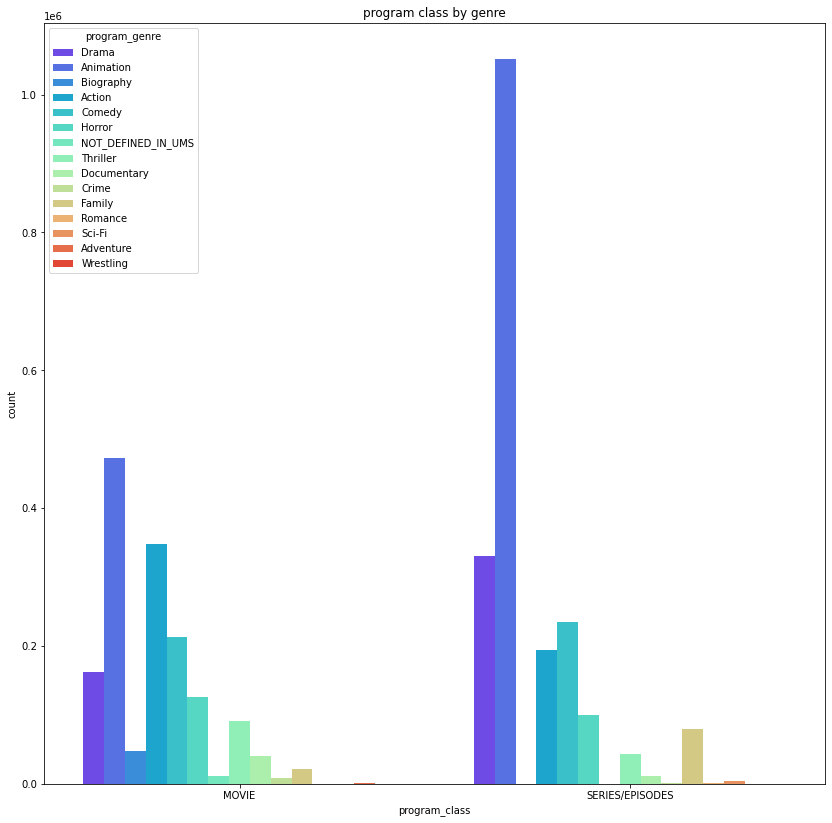

In [53]:
plt.figure(figsize=(14,14))
sns.countplot(x='program_class',data=df, hue='program_genre', palette='rainbow')
plt.title('program class by genre')
plt.show()

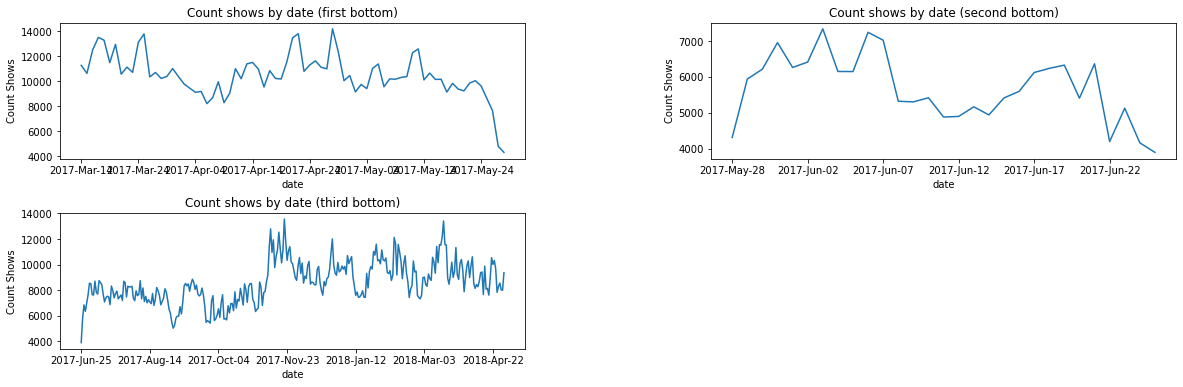

In [54]:
sub_date_go_down1=df.loc[df['date_']<='2017-05-28']
sub_date_go_down1=sub_date_go_down1.sort_values(by='date_')

sub_date_go_down2=df.loc[df['date_']<='2017-06-25']
sub_date_go_down2=sub_date_go_down2.loc[df['date_']>='2017-05-28']
sub_date_go_down2=sub_date_go_down2.sort_values(by='date_')

sub_date_Go_Down3=df.loc[df['date_']>='2017-06-25']
sub_date_Go_Down3=sub_date_Go_Down3.sort_values(by='date_')

fig = plt.figure(figsize=(20,6))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(2, 2, 3)
sub_date_Go_Down3.groupby(pd.to_datetime(sub_date_Go_Down3['date_']).dt.strftime('%Y-%b-%d'), sort=False)['user_id_maped'].size().plot()
plt.title('Count shows by date (third bottom)')
plt.xlabel('date')
plt.ylabel('Count Shows')
ax = fig.add_subplot(2, 2, 2)
sub_date_go_down2.groupby(sub_date_go_down2['date_'].dt.strftime('%Y-%b-%d'), sort=False)['user_id_maped'].size().plot()
plt.title('Count shows by date (second bottom)')
plt.xlabel('date')
plt.ylabel('Count Shows')
ax = fig.add_subplot(2, 2, 1)
sub_date_go_down1.groupby(sub_date_go_down1['date_'].dt.strftime('%Y-%b-%d'), sort=False)['user_id_maped'].size().plot()
plt.title('Count shows by date (first bottom)')
plt.xlabel('date')
plt.ylabel('Count Shows')
plt.show();

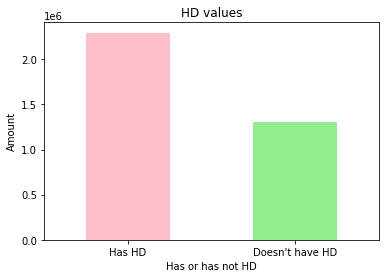

In [55]:
fig = df['hd'].value_counts().plot(kind = 'bar', color=['pink', 'lightgreen'])
fig.set_xticklabels(labels=['Has HD', "Doesn't have HD"], rotation=0);
plt.title("HD values")
plt.ylabel("Amount");
plt.xlabel("Has or has not HD");

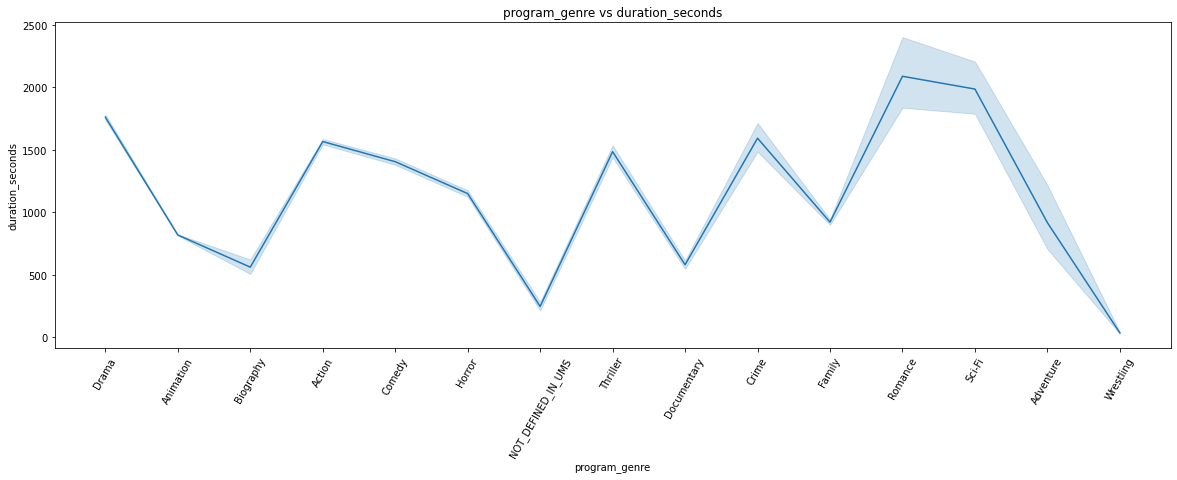

In [56]:
plt.figure(figsize=(20,6))
plt.title("program_genre vs duration_seconds")
sns.lineplot( x=df["program_genre"], y=df['duration_seconds'] )
plt.tick_params(axis='x', rotation=60)

Text(0, 0.5, 'Genre')

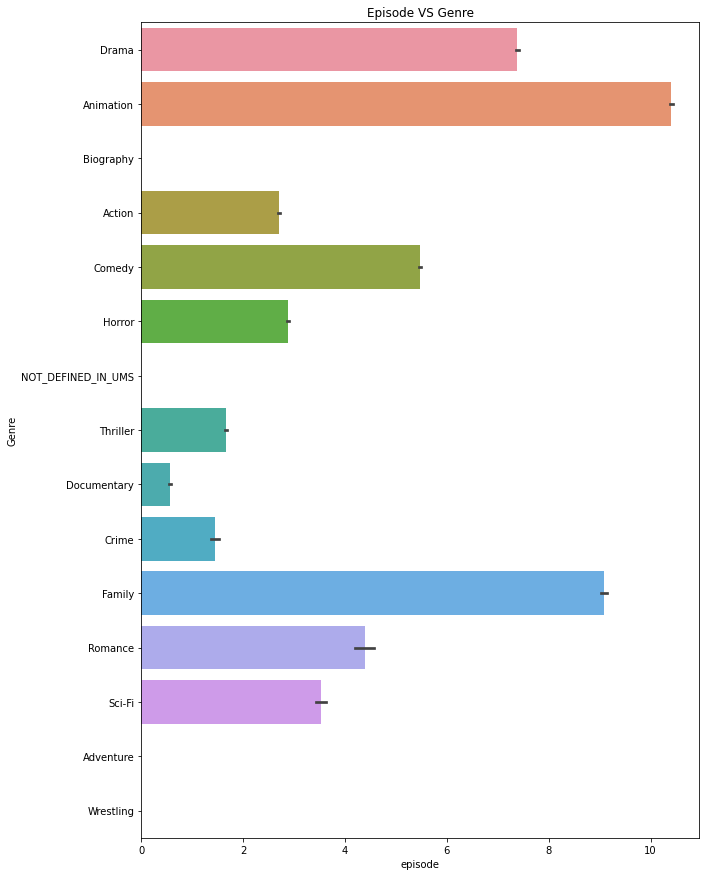

In [57]:
# Bar Chart
plt.figure(figsize=(10,15))
plt.title("Episode VS Genre")
sns.barplot(y=df['program_genre'] ,x=df['episode'])

plt.xlabel("episode")
plt.ylabel("Genre")

Text(0.5, 1.0, 'Top 10 program')

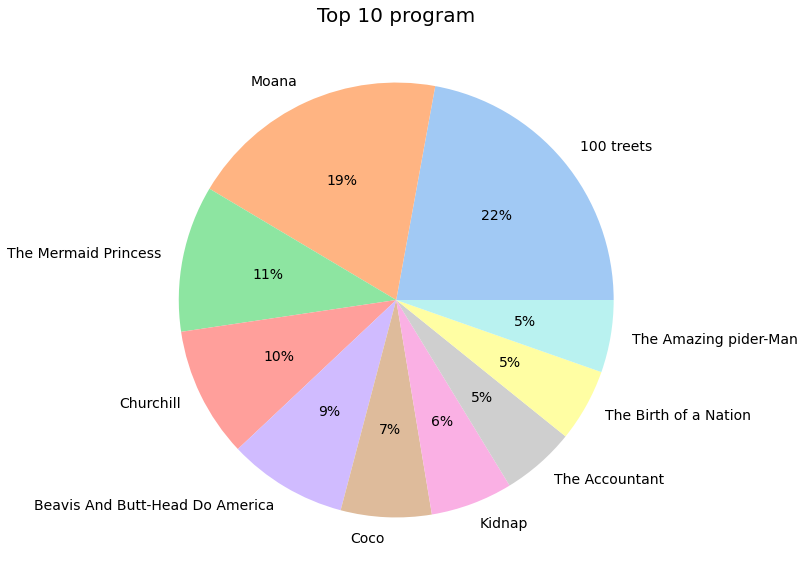

In [58]:
plt.figure(figsize=(10,10))

labels=df["program_name"].unique()
z=df["program_name"].value_counts()
colors = sns.color_palette('pastel')[0:10]  
plt.pie(z.iloc[:10],labels =labels[:10], colors = colors,autopct='%.0f%%',textprops={'fontsize': 14})
plt.title('Top 10 program', fontsize= 20)